In [79]:
#Importing the neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn import preprocessing
import datetime
#Importing the neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import datetime
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [80]:
#Importing our dataset
df_cab=pd.read_csv('cab_rides.csv')
#Creating an index label for the dataset
df_cab.reset_index(drop=True, inplace=True)

In [81]:
df_cab.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [82]:
df_cab.shape


(693071, 10)

In [83]:
df_cab = df_cab.iloc[0:30000, :]
df_cab.shape

(30000, 10)

In [84]:
df_cab.head(10)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
5,0.44,Lyft,1545071112138,North Station,Haymarket Square,16.5,1.0,f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,lyft_lux,Lux Black
6,1.08,Lyft,1543208580200,Northeastern University,Back Bay,10.5,1.0,462816a3-820d-408b-8549-0b39e82f65ac,lyft_plus,Lyft XL
7,1.08,Lyft,1543780384677,Northeastern University,Back Bay,16.5,1.0,474d6376-bc59-4ec9-bf57-4e6d6faeb165,lyft_lux,Lux Black
8,1.08,Lyft,1543818482645,Northeastern University,Back Bay,3.0,1.0,4f9fee41-fde3-4767-bbf1-a00e108701fb,lyft_line,Shared
9,1.08,Lyft,1543315522249,Northeastern University,Back Bay,27.5,1.0,8612d909-98b8-4454-a093-30bd48de0cb3,lyft_luxsuv,Lux Black XL


In [85]:
df_cab.describe()

,distance,time_stamp,price,surge_multiplier
count,30000.000000,3.000000e+04,27637.000000,30000.000000
mean,2.162571,1.544031e+12,16.498245,1.015458
std,1.123125,6.878651e+08,9.277613,0.097601
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.260000,1.543439e+12,9.000000,1.000000
50%,2.120000,1.543724e+12,13.500000,1.000000
75%,2.870000,1.544816e+12,22.500000,1.000000
max,7.460000,1.545161e+12,92.000000,2.500000


In [86]:
#data cleaning and pre processing
df_cab.isnull().sum()

distance               0
cab_type               0
time_stamp             0
destination            0
source                 0
price               2363
surge_multiplier       0
id                     0
product_id             0
name                   0
dtype: int64

In [87]:
df_cab['cab_type'].value_counts()

Uber    16483
Lyft    13517
Name: cab_type, dtype: int64

In [88]:
df_cab['destination'].value_counts()

North End                  2675
Haymarket Square           2672
Northeastern University    2652
Fenway                     2612
Theatre District           2499
Beacon Hill                2485
North Station              2481
Back Bay                   2437
Boston University          2412
West End                   2388
Financial District         2380
South Station              2307
Name: destination, dtype: int64

In [89]:
df_cab['source'].value_counts()

Theatre District           2695
Fenway                     2691
North Station              2555
Beacon Hill                2542
Haymarket Square           2524
Financial District         2523
West End                   2512
Back Bay                   2503
North End                  2481
Northeastern University    2428
South Station              2299
Boston University          2247
Name: source, dtype: int64

In [90]:
df_cab['surge_multiplier'].value_counts()

1.00    29005
1.25      526
1.50      219
1.75      125
2.00      117
2.50        8
Name: surge_multiplier, dtype: int64

In [91]:
df_cab['name'].value_counts()

Taxi            2363
UberPool        2362
UberX           2354
UberXL          2353
Black           2351
Black SUV       2351
WAV             2349
Lux Black XL    2265
Lux             2262
Lux Black       2257
Lyft XL         2248
Shared          2247
Lyft            2238
Name: name, dtype: int64

In [92]:
import datetime
#convert 13digit time stamp to datetime format
df_cab['date_time']= pd.to_datetime(df_cab['time_stamp']/1000, unit='s')
df_cab['date']= df_cab['date_time'].dt.date
df_cab['day'] = df_cab.date_time.dt.dayofweek
df_cab['hour'] = df_cab.date_time.dt.hour
#extract hours only
df_cab['fare_per_mile']= round(df_cab.price/df_cab.distance,2)

In [93]:
#To check if cab data has changed.
df_cab.head(2)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date_time,date,day,hour,fare_per_mile
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890000128,2018-12-16,6,9,11.36
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 02:00:23.676999936,2018-11-27,1,2,25.00


In [94]:
#After conversion to a new column time we can delete the exisitng column
del df_cab['time_stamp']

In [96]:
#Replacing null values.
df_cab['fare_per_mile']=df_cab['fare_per_mile'].astype(float)
df_cab['fare_per_mile'].fillna('2.8',inplace=True)
df_cab['price'] = df_cab['fare_per_mile']*df_cab['distance']

In [98]:
#After replacement checking if the change is reflected in the dataset.
df_cab.price.isnull().sum()

0

In [99]:
#Visualizations for Data Preprocessing
#Mentioning our graph sizes
from pylab import rcParams
rcParams['figure.figsize'] = 16,10

Text(0.5, 1.0, 'DATA SUMMARY')

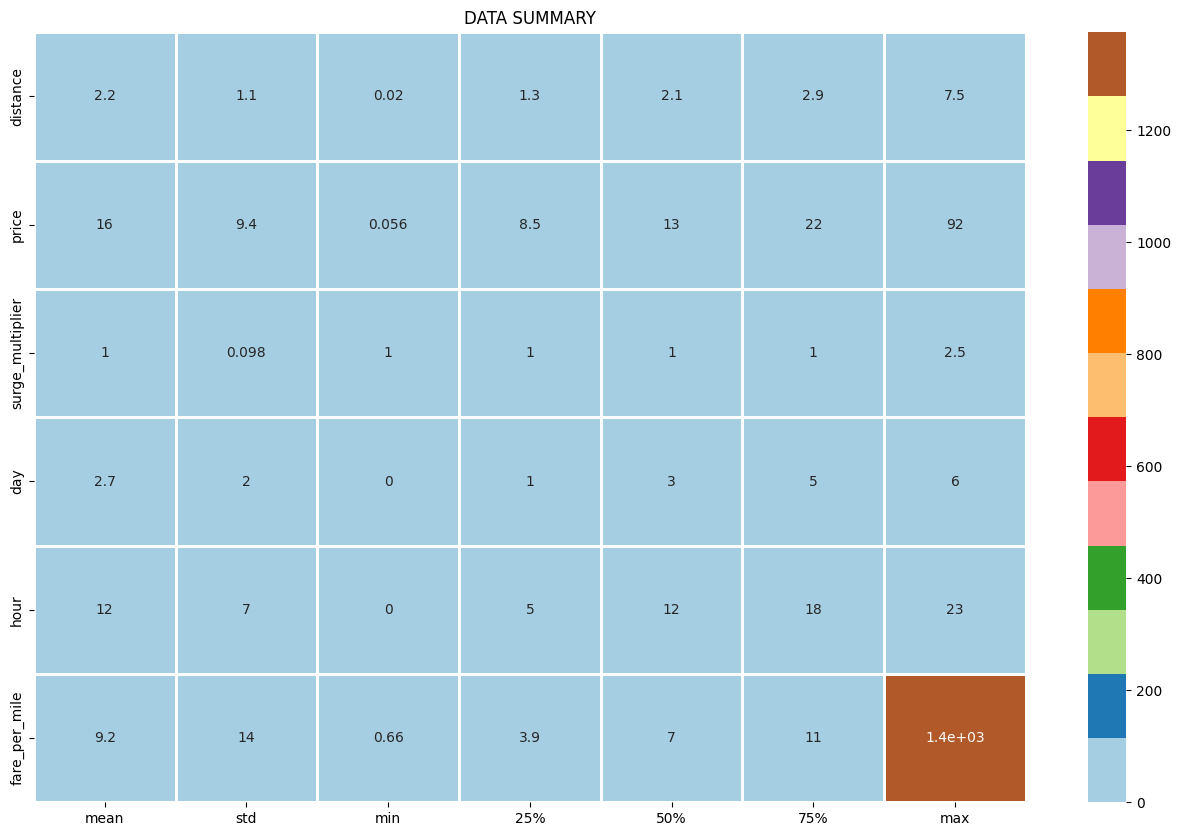

In [100]:
sns.heatmap(df_cab.describe()[1:].transpose(),annot=True,linecolor='w',linewidth=2,cmap=sns.color_palette('Paired'))
plt.title("DATA SUMMARY")

<ipython-input-101-fed47aa11c7b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df_cab.corr()


Text(0.5, 1.0, 'CORRELATION BETWEEN VARIABLES')

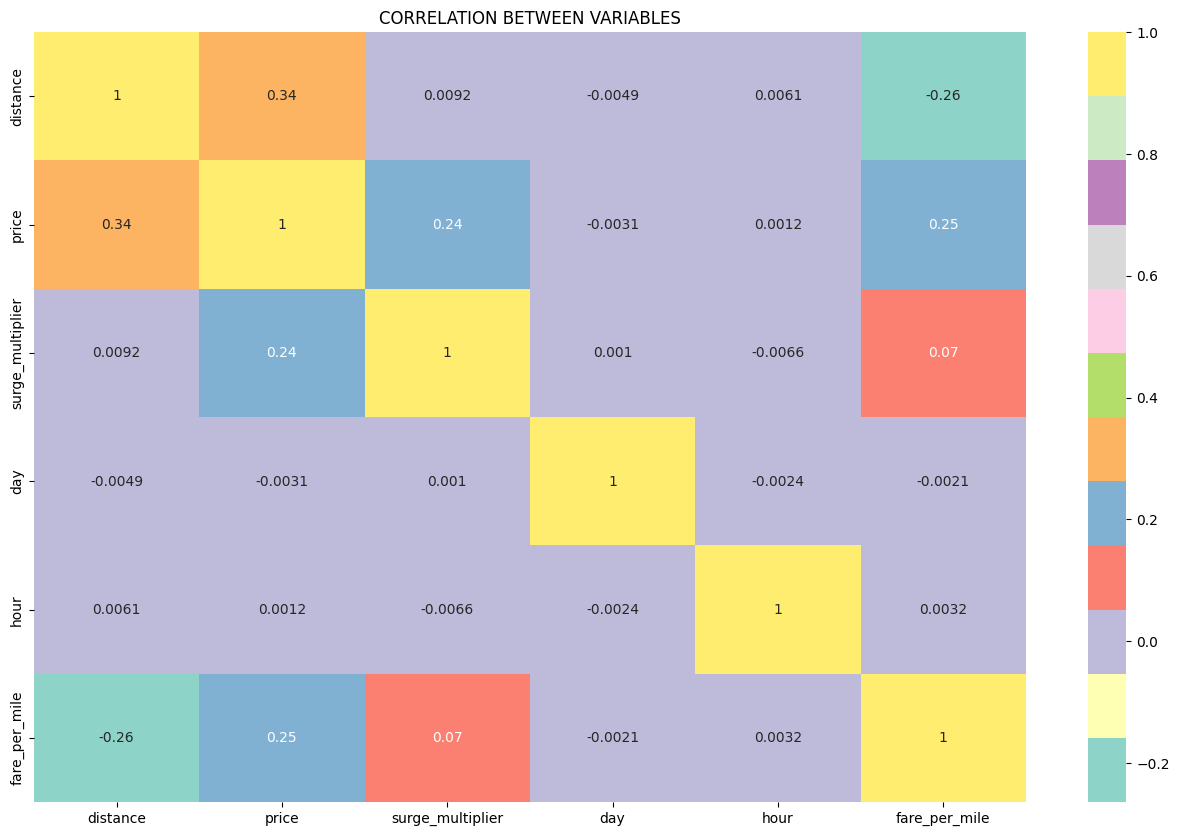

In [101]:
#Heatmap from searborn library
df_corr = df_cab.corr()
sns.heatmap(df_corr, cmap =sns.color_palette("Set3"),annot = True)
plt.title("CORRELATION BETWEEN VARIABLES")

In [102]:
#Data preparation for Data preprocessing
#Import the new dataset and view the attributes
df_weather=pd.read_csv('weather.csv')
df_weather.head(2)

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32


In [103]:
df_weather['rain'].fillna(0, inplace = True)

In [104]:
#Splitting the time_stamp attribute in weather to two attributes which are time and data
df_weather['date_time'] = pd.to_datetime(df_weather['time_stamp'], unit='s')
del df_weather['time_stamp']

#df_weather['date_time']

In [105]:
#merge the datasets to refelect same time for a location
df_cab['merge_date'] = df_cab.source.astype(str) +" - "+ df_cab.date_time.dt.date.astype("str") +" - "+ df_cab.date_time.dt.hour.astype("str")
df_weather['merge_date'] = df_weather.location.astype(str) +" - "+ df_weather.date_time.dt.date.astype("str") +" - "+ df_weather.date_time.dt.hour.astype("str")
print(df_cab.head(2))
print(df_weather.head(2))

   distance cab_type    destination            source    price  \
0      0.44     Lyft  North Station  Haymarket Square   4.9984   
1      0.44     Lyft  North Station  Haymarket Square  11.0000   

   surge_multiplier                                    id    product_id  \
0               1.0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7     lyft_line   
1               1.0  4bd23055-6827-41c6-b23b-3c491f24e74d  lyft_premier   

     name                     date_time        date  day  hour  fare_per_mile  \
0  Shared 2018-12-16 09:30:07.890000128  2018-12-16    6     9          11.36   
1     Lux 2018-11-27 02:00:23.676999936  2018-11-27    1     2          25.00   

                          merge_date  
0  Haymarket Square - 2018-12-16 - 9  
1  Haymarket Square - 2018-11-27 - 2  
    temp     location  clouds  pressure    rain  humidity   wind  \
0  42.42     Back Bay     1.0   1012.14  0.1228      0.77  11.25   
1  42.43  Beacon Hill     1.0   1012.15  0.1846      0.76  11.32   

         

In [106]:
df_weather = df_weather.groupby(['merge_date']).mean()
df_weather.reset_index(inplace=True)
df_weather.head()

<ipython-input-106-0c6e16b2a0c2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_weather = df_weather.groupby(['merge_date']).mean()


,merge_date,temp,clouds,pressure,rain,humidity,wind
0,Back Bay - 2018-11-26 - 10,40.695,0.995,1014.800,0.0000,0.940,1.895
1,Back Bay - 2018-11-26 - 11,40.185,0.955,1015.305,0.0000,0.940,2.260
2,Back Bay - 2018-11-26 - 12,40.315,0.920,1015.275,0.0000,0.935,2.940
3,Back Bay - 2018-11-26 - 13,41.950,0.910,1015.200,0.0031,0.910,3.545
4,Back Bay - 2018-11-26 - 14,42.765,0.905,1014.695,0.0044,0.910,2.960


In [107]:
#Merging based on the date and location.
df_merged = pd.merge(df_cab, df_weather, on='merge_date')
print(df_merged.shape)

(29867, 21)


In [108]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29867 entries, 0 to 29866
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   distance          29867 non-null  float64       
 1   cab_type          29867 non-null  object        
 2   destination       29867 non-null  object        
 3   source            29867 non-null  object        
 4   price             29867 non-null  float64       
 5   surge_multiplier  29867 non-null  float64       
 6   id                29867 non-null  object        
 7   product_id        29867 non-null  object        
 8   name              29867 non-null  object        
 9   date_time         29867 non-null  datetime64[ns]
 10  date              29867 non-null  object        
 11  day               29867 non-null  int64         
 12  hour              29867 non-null  int64         
 13  fare_per_mile     29867 non-null  float64       
 14  merge_date        2986

In [109]:
df_merged.shape

(29867, 21)

In [110]:
print(df_merged.columns)

Index(['distance', 'cab_type', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'date_time', 'date',
       'day', 'hour', 'fare_per_mile', 'merge_date', 'temp', 'clouds',
       'pressure', 'rain', 'humidity', 'wind'],
      dtype='object')


Text(0.5, 1.0, 'DATA SUMMARY')

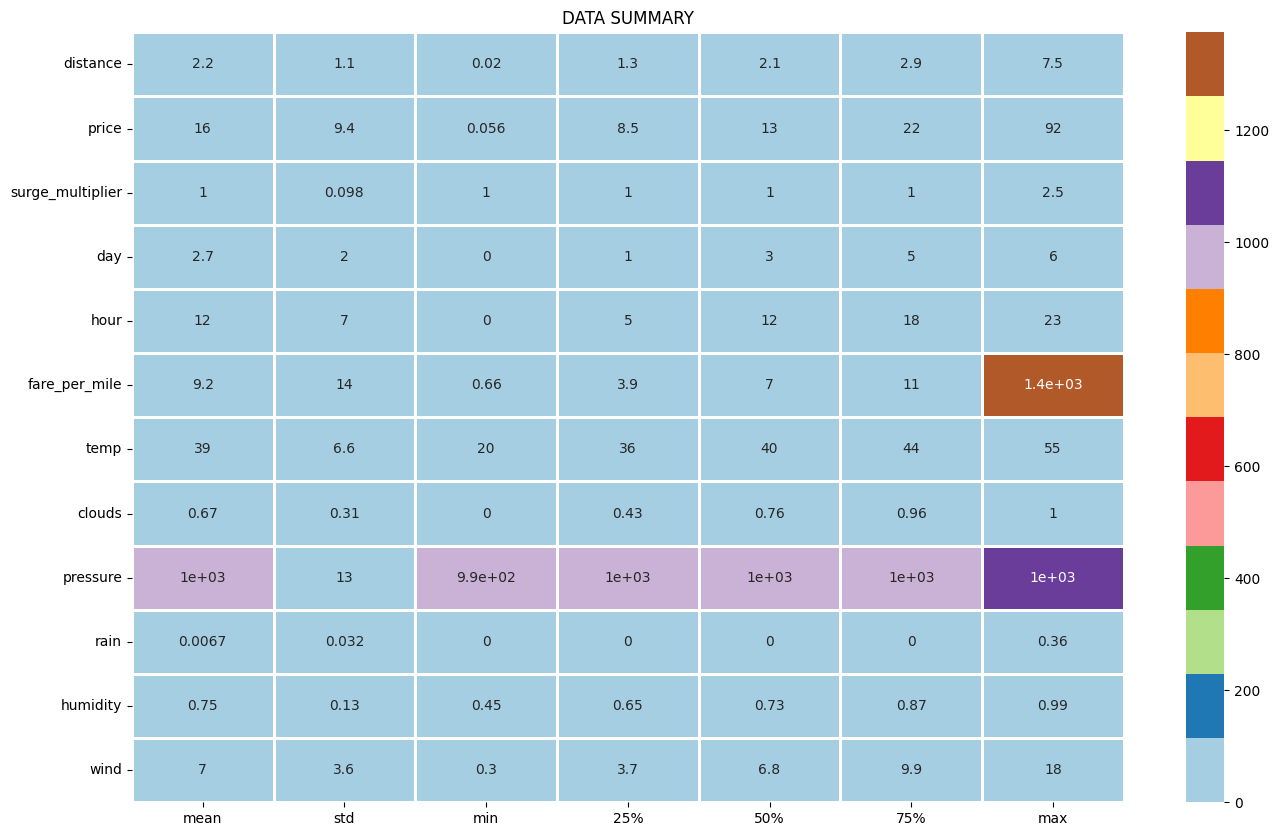

In [111]:
#Visualization of merged dataset
sns.heatmap(df_merged.describe()[1:].transpose(),annot=True,linecolor='w',linewidth=2,cmap=sns.color_palette('Paired'))
plt.title("DATA SUMMARY")

<ipython-input-112-7b5c0124b51f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df_merged.corr()


Text(0.5, 1.0, 'CORRELATION BETWEEN VARIABLES')

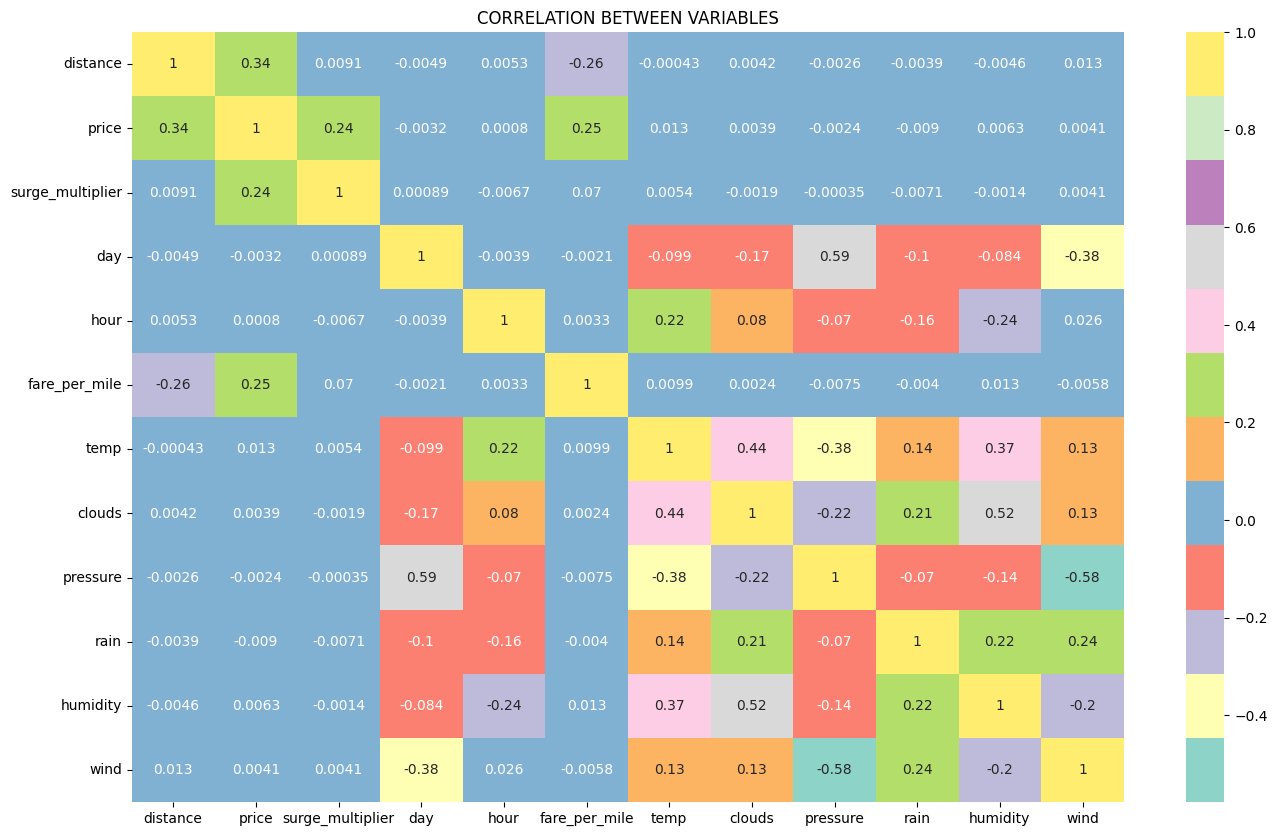

In [112]:
df_corr = df_merged.corr()
sns.heatmap(df_corr, cmap =sns.color_palette("Set3"),annot = True)
plt.title("CORRELATION BETWEEN VARIABLES")

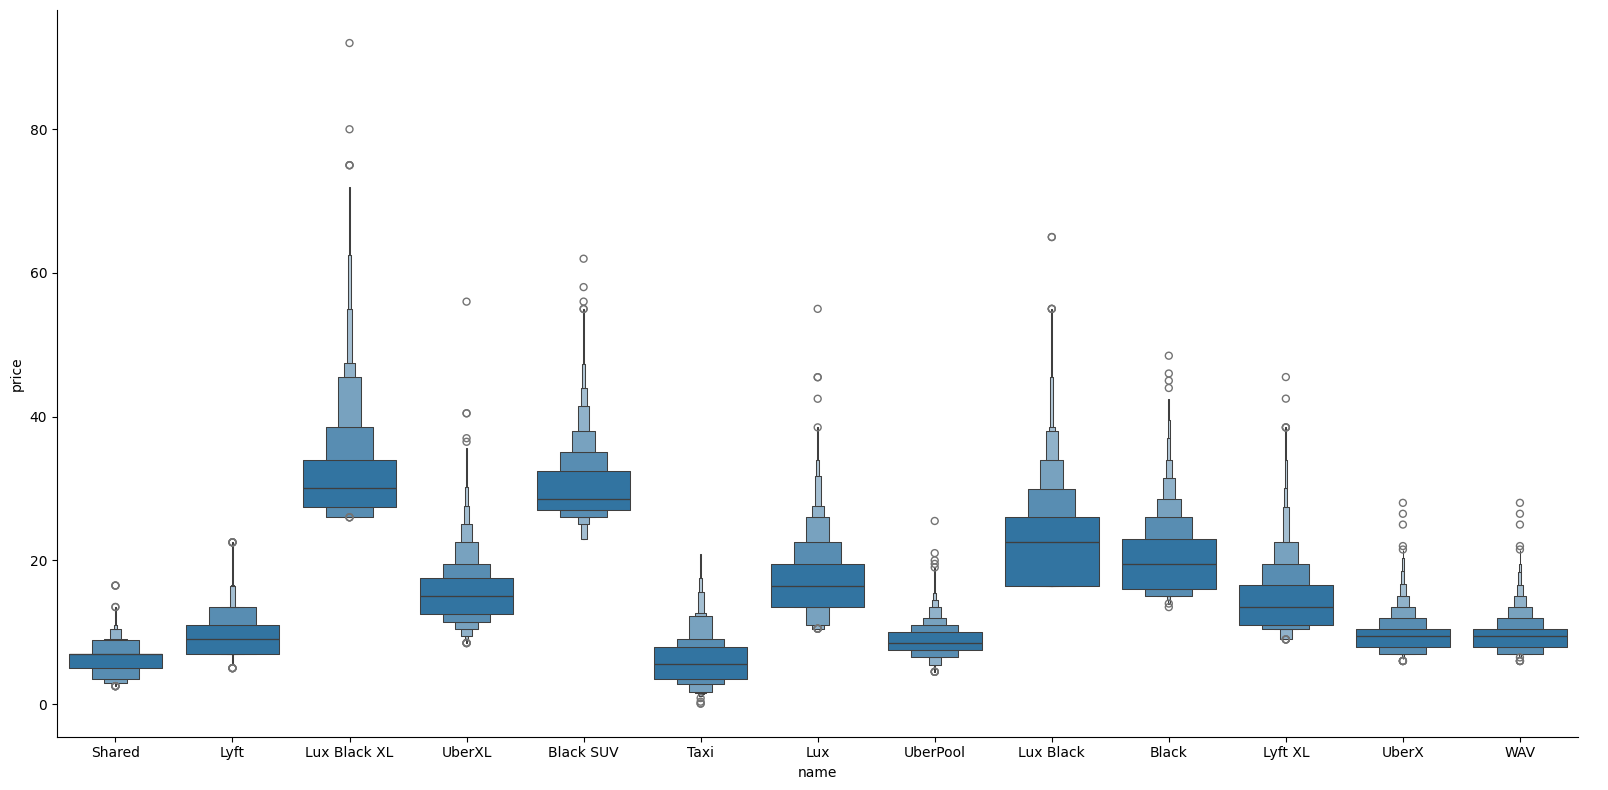

In [113]:
#Catplot
sns.catplot(x="name", y="price", data=df_merged,kind="boxen", height=8, aspect=2);

<ipython-input-116-b56d83c71e4c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_merged, x='source',y='price',palette='Blues')


<Axes: xlabel='source', ylabel='price'>

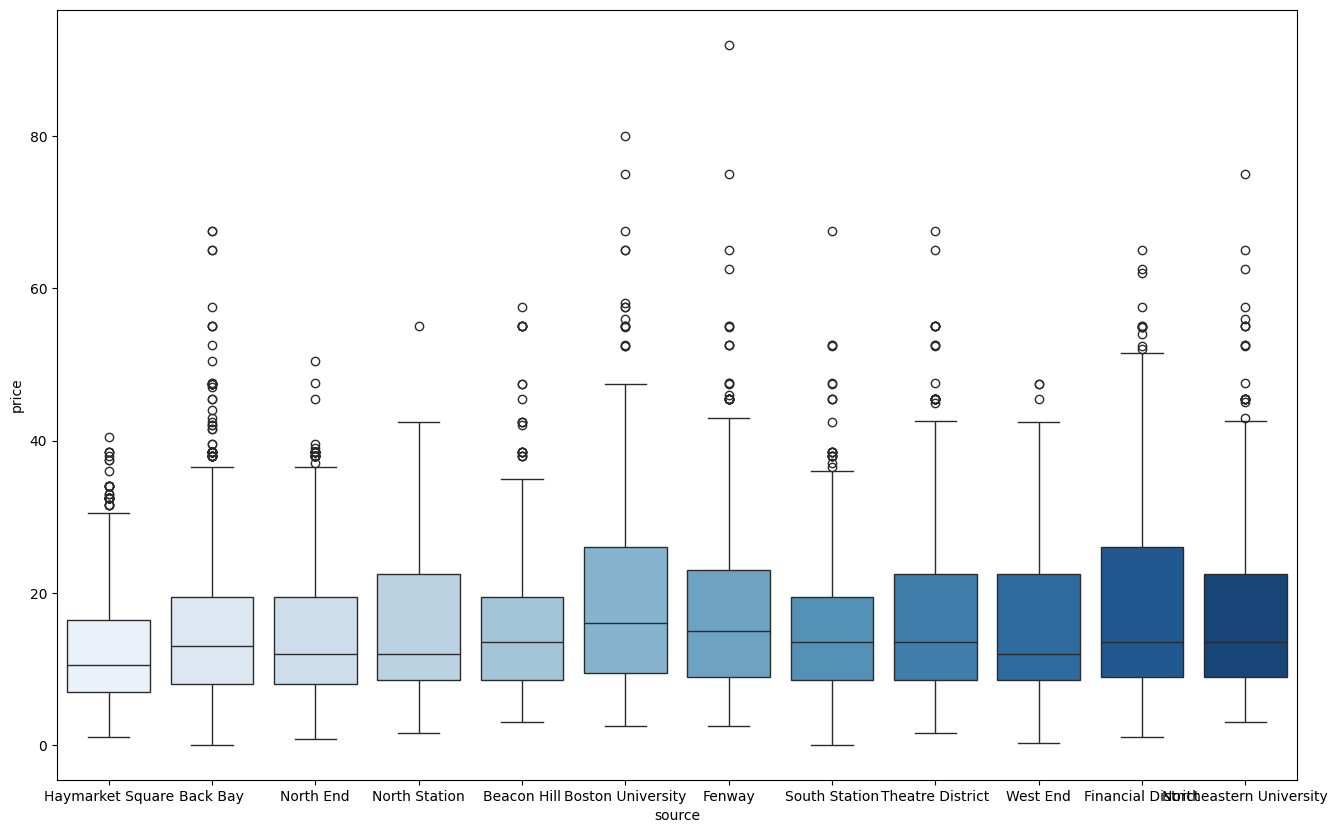

In [116]:
sns.boxplot(data=df_merged, x='source',y='price',palette='Blues')

<ipython-input-117-c6ee7d4289b5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_merged, x='destination', y='price',palette="Set3",scale="width")
<ipython-input-117-c6ee7d4289b5>:1: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=df_merged, x='destination', y='price',palette="Set3",scale="width")


<Axes: xlabel='destination', ylabel='price'>

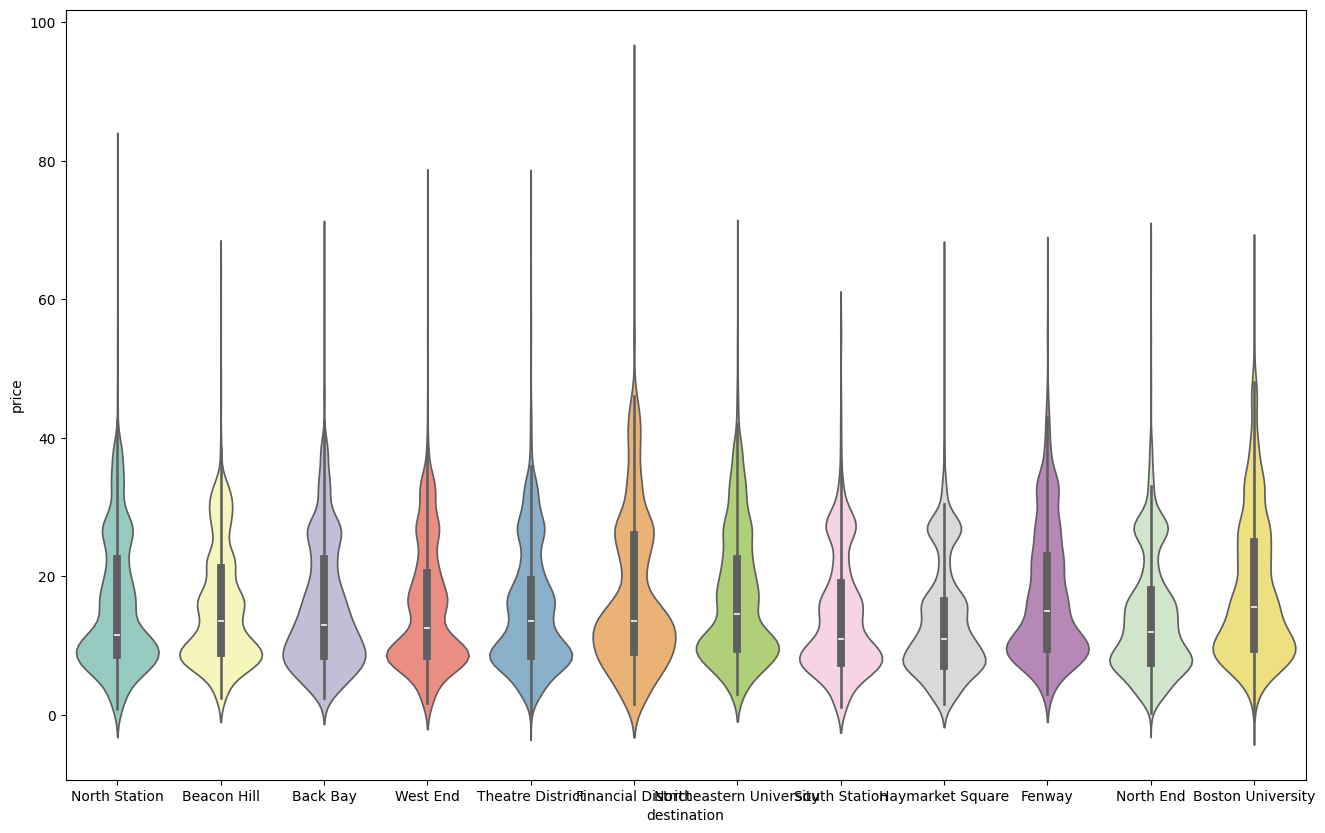

In [117]:
sns.violinplot(data=df_merged, x='destination', y='price',palette="Set3",scale="width")

name
Black           Axes(0.125,0.11;0.775x0.77)
Black SUV       Axes(0.125,0.11;0.775x0.77)
Lux             Axes(0.125,0.11;0.775x0.77)
Lux Black       Axes(0.125,0.11;0.775x0.77)
Lux Black XL    Axes(0.125,0.11;0.775x0.77)
Lyft            Axes(0.125,0.11;0.775x0.77)
Lyft XL         Axes(0.125,0.11;0.775x0.77)
Shared          Axes(0.125,0.11;0.775x0.77)
Taxi            Axes(0.125,0.11;0.775x0.77)
UberPool        Axes(0.125,0.11;0.775x0.77)
UberX           Axes(0.125,0.11;0.775x0.77)
UberXL          Axes(0.125,0.11;0.775x0.77)
WAV             Axes(0.125,0.11;0.775x0.77)
Name: price, dtype: object

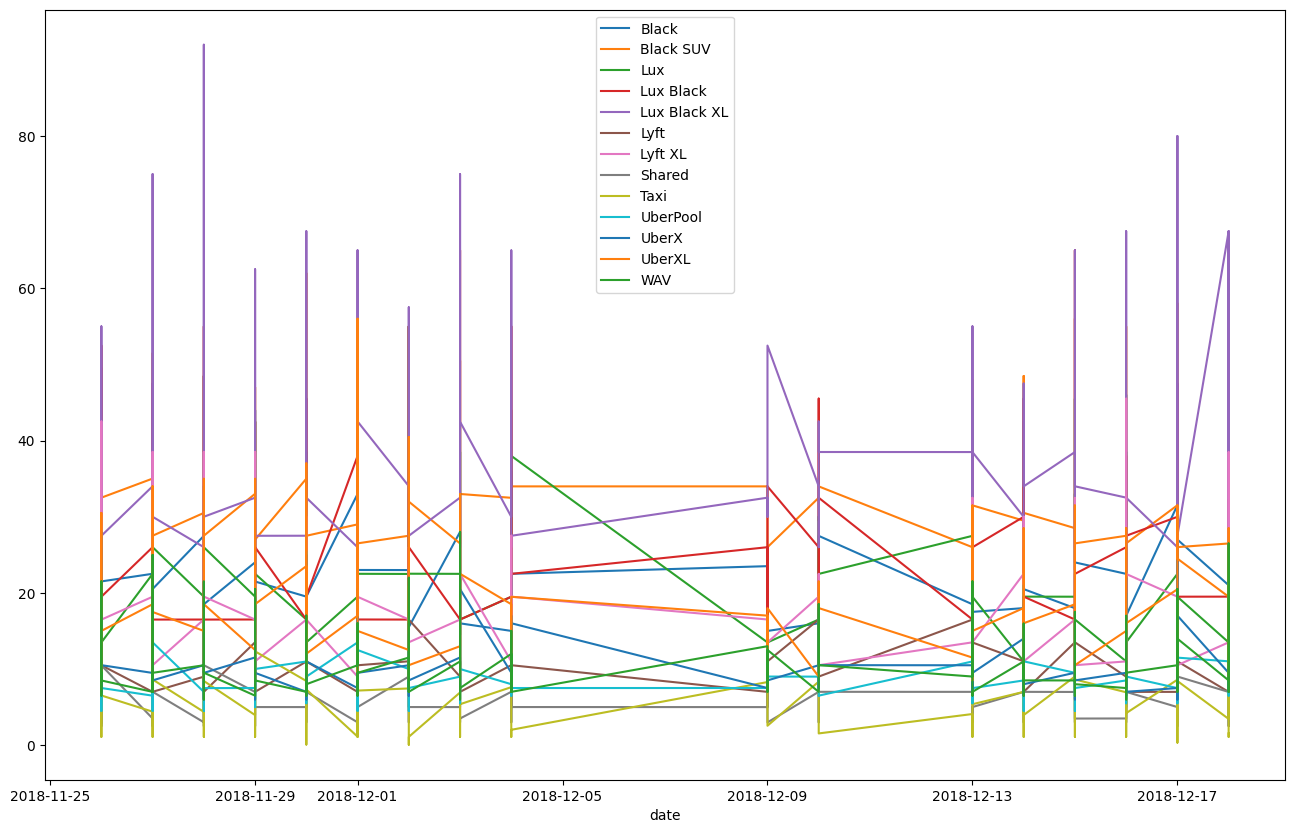

In [120]:
df_merged.set_index('date').groupby('name')['price'].plot(legend=True)

<ipython-input-121-732c4b955953>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_merged.price, rug=True, rug_kws={"color": "g"},


<Axes: xlabel='price', ylabel='Density'>

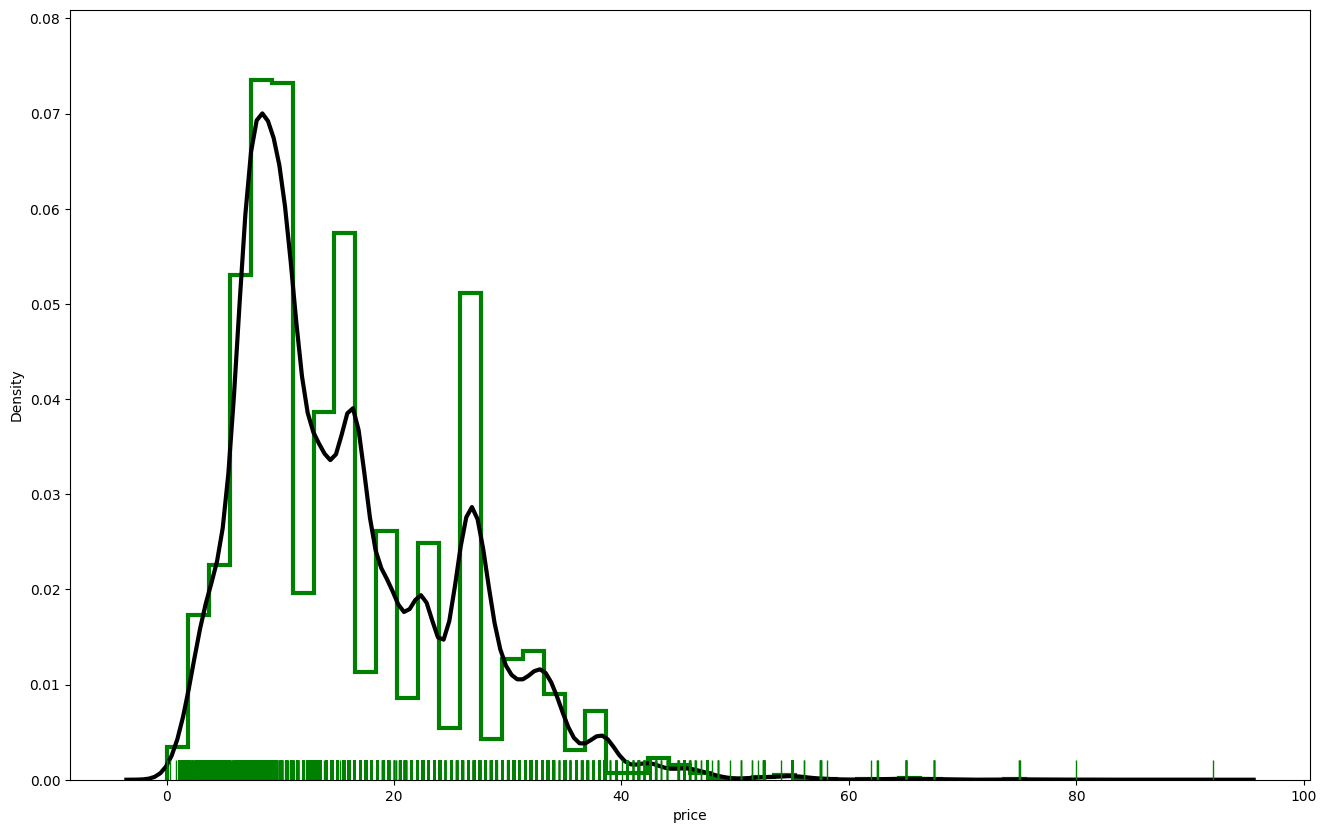

In [121]:
sns.distplot(df_merged.price, rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                             "alpha": 1, "color": "g"})

In [122]:
#Dropping certain columns as they are not neccessary for predictions
df_merged = df_merged.drop(['date_time','id','product_id'], axis=1)
f_merged = df_merged.drop(['fare_per_mile','surge_multiplier'],axis=1)
df_merged = df_merged.loc[:, df_merged.columns !='merge_date']

In [123]:
#Splitting the dataset
OverallData = df_merged.drop(['cab_type'],axis=1)
uber = df_merged[df_merged['cab_type']=='Uber']
uber.reset_index(inplace=True)
uber.drop('index', axis=1, inplace=True)
lyft = df_merged[df_merged['cab_type']=='Lyft']
lyft.reset_index(inplace=True)
lyft.drop('index', axis=1, inplace=True)

<ipython-input-123-4f38479927f3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber.drop('index', axis=1, inplace=True)
<ipython-input-123-4f38479927f3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lyft.drop('index', axis=1, inplace=True)


In [124]:
#Removing the cab type from uber and lyft
uber.drop('cab_type', axis=1, inplace=True)
lyft.drop('cab_type', axis=1, inplace=True)

<ipython-input-124-e9f78462e102>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber.drop('cab_type', axis=1, inplace=True)
<ipython-input-124-e9f78462e102>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lyft.drop('cab_type', axis=1, inplace=True)


In [125]:
#Overview of all the columns present
print(OverallData.columns)
print(uber.columns)
print(lyft.columns)

Index(['distance', 'destination', 'source', 'price', 'surge_multiplier',
       'name', 'date', 'day', 'hour', 'fare_per_mile', 'temp', 'clouds',
       'pressure', 'rain', 'humidity', 'wind'],
      dtype='object')
Index(['distance', 'destination', 'source', 'price', 'surge_multiplier',
       'name', 'date', 'day', 'hour', 'fare_per_mile', 'temp', 'clouds',
       'pressure', 'rain', 'humidity', 'wind'],
      dtype='object')
Index(['distance', 'destination', 'source', 'price', 'surge_multiplier',
       'name', 'date', 'day', 'hour', 'fare_per_mile', 'temp', 'clouds',
       'pressure', 'rain', 'humidity', 'wind'],
      dtype='object')


In [126]:
#Transformations in Data Preprocessing
Xd = OverallData.loc[:, OverallData.columns != 'price']
yd = OverallData['price']
Xd_train,Xd_test,yd_train,yd_test = train_test_split(Xd,yd,test_size = 0.33, random_state=42)

In [127]:

Xu = uber.loc[:, uber.columns != 'price']
yu = uber['price']
Xu_train,Xu_test,yu_train,yu_test = train_test_split(Xu,yu,test_size = 0.33, random_state=42)

In [128]:
Xl = lyft.loc[:, lyft.columns != 'price']
yl = lyft['price']
Xl_train,Xl_test,yl_train,yl_test = train_test_split(Xl,yl,test_size = 0.33, random_state=42)

In [129]:
#PIPELINING
numerical_features = Xu.dtypes == 'float'
categorical_features = ~numerical_features
preprocess = make_column_transformer(
(numerical_features, StandardScaler()),
(categorical_features, OneHotEncoder()))
rt = RandomForestRegressor(n_estimators=200,random_state = 42)


In [139]:
#Uber Data
uber_a=uber.copy()
print(uber_a['price'].max())
print(uber_a['price'].min())
print(uber_a['distance'].max())
print(uber_a['distance'].min())


61.98240000000001
0.055999999999999994
7.46
0.02


In [140]:
price_bins = [0,5,15,30,45,60]
price_categories = ['very low price','low price','medium range price','high price','very high price']
uber_a['price'] = pd.cut(uber_a['price'], price_bins, labels = price_categories)

In [141]:
distance_bins = [0,1,2.5,4,5,6]
distance_categories = ['very less distance','less distance','medium range distance','far ','too far']
uber_a['distance'] = pd.cut(uber_a['distance'], distance_bins, labels = distance_categories)

In [144]:
#Lyft Data
lyft_a=lyft.copy()
print(lyft_a['price'].max())
print(lyft_a['price'].min())
print(lyft_a['distance'].max())
print(lyft_a['distance'].min())

91.99849999999999
2.4888
5.45
0.4
